In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

# Module 1: Analyzing returns
---


# 1. Fundamentals of return and risk


## Returns basics

Most financial studies involve returns, instead prices, of assets. Two main reasons are given for using return. First, for average investors, return of an asset is a complete and scale-free summary of the investment opportunity. Second, return series are easier to handle than prices series because the former have more attractive statistical properties, which will be studied later.

There are, however, several important definitions of asset returns.

Let $P_t$ be the price of an asset at time $t$.

### One-period simple return

Holding the asset for one period from date $t-1$ to date $t$ would result in a simple gross return of:

$$1 + R_t = \dfrac{P_t}{P_{t-1}}$$

The corresponding one-period simple net return is:

$$R_t = \dfrac{P_t}{P_{t-1}} - 1$$


#### A warning:

If during the period your are computing the return there is a dividend payment, it must be added to the price in order to compute the return, otherwise you will not be computing it correctly:

$$R_t = \dfrac{P_t + D_t}{P_{t-1}} - 1$$

The *Adjusted Close Price* account for dividend payments and splits.

### Multiperiod simple return

Holding the asset for $k$ periods between dates $t-j$ and $t$ gives a $k$-period simple gross return of:

$$1 + R_t[k] = \dfrac{P_t}{P_{t-k}} = \dfrac{P_t}{P_{t-1}} \times \dfrac{P_{t-1}}{P_{t-2}}\times \dots \dfrac{P_{t-(k-1)}}{P_{t-k}}$$

$$ 1 + R_t[k] = (1 + R_t)\times(1 + R_{t-1}) \times \dots (1 + R_{t-(k-1)}) $$

$$1 + R_t[k] = \prod_{j=0}^{k-1}(1 + R_{t-j})$$


### Annualizing returns

In practice, the actual time interval is important in discussing and comparing returns (e.g. daily, monthly or annual). 
If the asset was held for k years, then the annualized return is defined as:

$$Annualized \lbrace R_t[k] \rbrace = R_t[k]^{1/k} -1 $$

(If the asset was held for a month, then $1/k = 12$)

### Continuous compounding

The net asset value A of continuous compounding is:

$$A = C \exp (r\times n)$$

where $r$ is the interest rate (say, annual), $C$ is the initial capital and $n$ is the number of periods (say, years).

From the above equation we have:

$$C = A \exp (-r\times n)$$

 which is referred to as the *present value* of an asset that is worth $A$ dollars $n$ years from now, assuming that the continously compounded interest rate is $r$ per annum.
 
### Continuously compounded returns
 
The above formula can be applied to asset prices. We then have:

$$P_{t} = P_{t-1} \exp(r_t)$$

If we apply natural logarithm, we get:

$$r_t = ln(1 + R_t) = ln \left(\dfrac{P_t}{P_{t-1}}\right) = p_t - p_{t-1}$$

where $p_t = ln(p_t)$

The natural logarithm of the simple gross return of an asset is called the continuously compounded return or *log return*.

Continously compounded returns $r_t$ enjoy some advantages over the simple net return $R_t$. First, consider multiperiod returns. We have:

$$r_t[k] = ln(1 + R_t[k]) = ln[(1 + R_t)(1+R_{t-1})\dots (1+R_{t-(k-1)}]$$

$$r_t[k] = ln(1 + R_t) + ln(1 + R_{t-1}) + \dots + ln(1 + R_{t-(k-1)}) $$

$$r_t[k] = r_t + r_{t-1}+ \dots + r_{t-(k-1)}$$

Thus, the continuously compounded multiperiod return is simply the sum of continuously compounded one-period returns involved. Second, statistical properties of log returns are more tractables.

### Simple vs continous returns
For the purpose of analyzing the result of an investment, simple returns are used. Continuous returns, on the other hand, are used for modelling asset prices.

## Volatility

In order to compare returns of different assets, we need a measure of the risk -or volatility- associated to it.

#### Variance

$$\sigma^2_R= \dfrac{1}{N-1}\sum_{i=1}^N (R_i - \bar{R})^2$$

#### Standard Deviation:
$$\sigma_R = \sqrt{\dfrac{1}{N-1}\sum_{i=1}^N (R_i - \bar{R})^2}$$


### Annualizing Volatility

Same as with returns, we can change the unit of time of volatility in order to make it comparable. In order to do that, we multiply the original volatility (standard deviation) by the squared root of the time ratio between where we are and where we want to go. 

$$\sigma_{ann} = \sigma_p \sqrt{p}$$

If we want to annualize daily volatility:

$$\sigma_{ann} = \sigma_{d} \sqrt{252}$$

## Real data

We are going to work with a Fama-French database which shows the monthly returns of portfolios formed by companies with different size. We are going to focus on the 10 smallest and 10 largest companies portfolios.

In [43]:
import os
os.getcwd()

'C:\\Users\\jsaul\\Dropbox\\gdp-trabajos-ana\\Notebooks\\Portfolio Construction with Python'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc("font",family="serif")
plt.rc("font",size=15)

In [54]:
data = pd.read_csv("Ana/Data/Portfolios_Formed_on_ME.csv",
                   header=0, index_col=0, parse_dates=True, na_values=-99.99)
data.head()
data.index = pd.to_datetime(data.index, format="%Y%m")

In [57]:
cols = ['Lo 10', 'Hi 10']
rets = data[cols]
rets.columns = ['SmallCap', 'LargeCap']

In [60]:
rets = rets/100

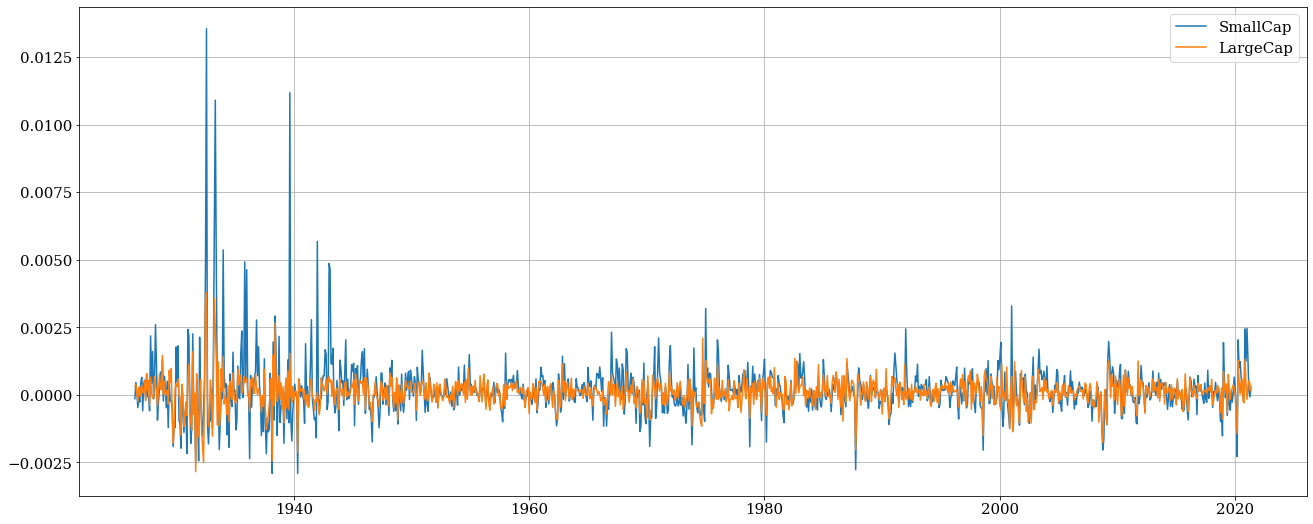

In [61]:
plt.figure(figsize = (22,9))
plt.plot(rets)
plt.grid()
plt.legend(rets.columns)

Small companies are clearly more volatile.

In [62]:
annualized_vol = rets.std()*np.sqrt(12)
annualized_vol

SmallCap    0.003682
LargeCap    0.001870
dtype: float64

We can now compute the annualized returns.

In [63]:
n_months = rets.shape[0]
return_per_month = (rets+1).prod()**(1/n_months) - 1
return_per_month

SmallCap    0.000181
LargeCap    0.000091
dtype: float64

In [64]:
annualized_return = (return_per_month + 1)**12-1
annualized_return

SmallCap    0.002174
LargeCap    0.001097
dtype: float64

Small Cap companies also provide more returns. 
So the question we have now is: how do we compare these two?

One way of thinking about it is to simply compute the ratio. That is, how much return did I get per unit of risk?
That's called a **return on risk ratio**. 

In [65]:
annualized_return/annualized_vol

SmallCap    0.590418
LargeCap    0.586904
dtype: float64

A better way to compare them is by using the **excess return**, which is the return that the asset provides in excess of no volatility option, which we will call the **risk free rate**.

The ratio between the excess return and the volatility is called the **Sharpe Ratio**.

$$SR_i = \frac{R_i - R_f}{\sigma_i}$$

In [66]:
riskfree_rate = 0.03
excess_return = annualized_return - riskfree_rate
sharpe_ratio = excess_return/annualized_vol
sharpe_ratio

SmallCap    -7.557354
LargeCap   -15.456856
dtype: float64

By taking the Sharpe Ratio as the metric to compare these two investing options, it looks like small caps actually give
us a slightly better risk-adjusted return than large caps. 

## Maximum drawdown

Since volatility is a measure of the dispersion of returns around the mean, it is not necessarily a bad thing. That is, it does not only accounts for negative results, but also for *better than expected* results. Another way to approach risk is to think about it as the possibility of losing money. The maximum drawdown is a risk measure that follows this definition being an indicator of downside risk.

The **maximum drawdown** is the maximum observed loss from a peak to a trough of a portfolio, before a new peak is attained. It is a measure of the worst possible return you could have experienced during the analyzed period.

$$MD = \frac{Through Value - Peak Value}{Peak Value}$$

The steps for calculating the MD are:

1. Constructing a wealth index.
2. Compute the peaks: the highest value the wealth index have experienced so far.
3. Compute the drawdown as the difference between the peak and the wealth index.
4. Find the maximum drawdown.

In [67]:
#1
wealth_index = 1000*(1+rets["LargeCap"]).cumprod()

In [68]:
#2
previous_peaks = wealth_index.cummax()

In [69]:
#3
drawdown = (wealth_index - previous_peaks)/previous_peaks

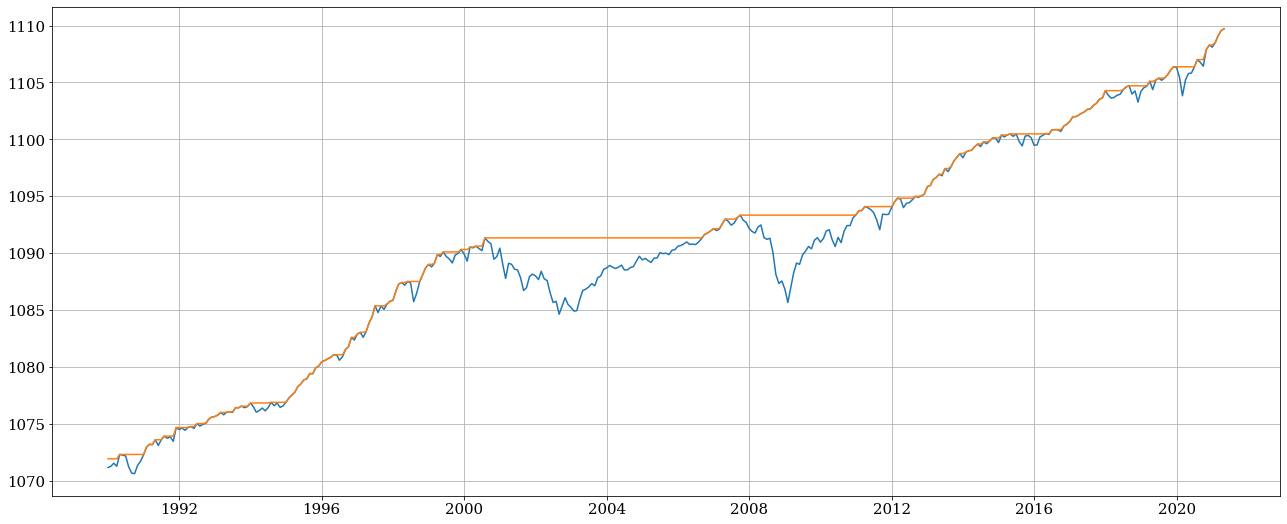

In [70]:
plt.figure(figsize = (22,9))
plt.plot(wealth_index['1990':], label = 'Wealth index')
plt.plot(previous_peaks['1990':], label = 'Previous peak')
plt.grid()

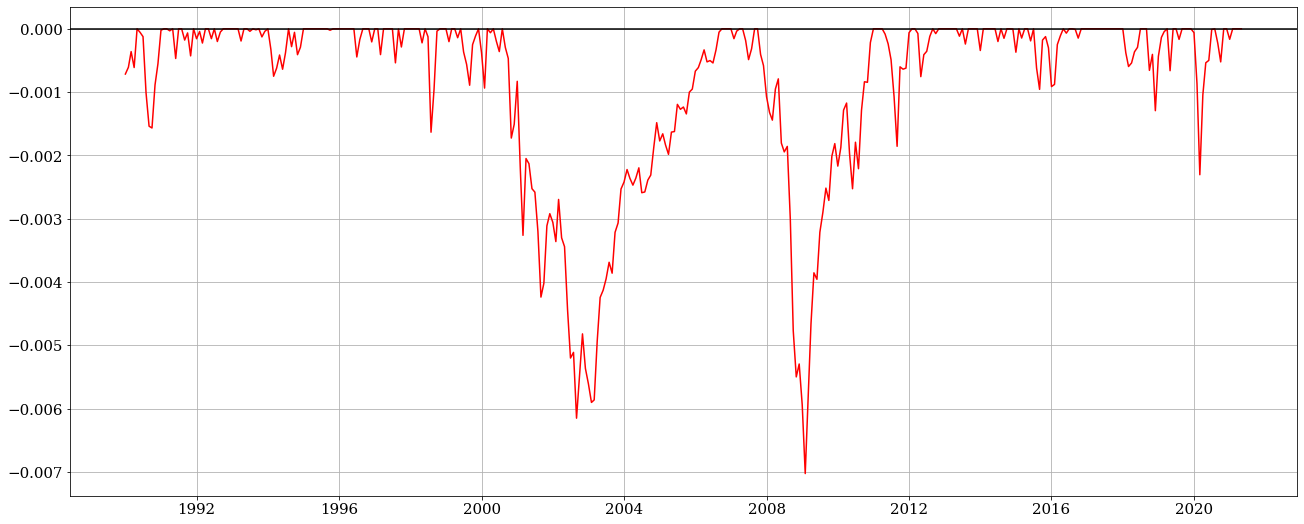

In [71]:
plt.figure(figsize = (22,9))
plt.plot(drawdown['1990':], color = 'red')
plt.axhline(0, color = 'k')
plt.grid()

In [72]:
# Max drawdown
drawdown.min()

-0.015847287938135644

### Creating a Drawdown Function

Redoing this analysis for SmallCap would be tedious, since we would need to re-enter all these commands at the prompt. Instead, let's create a function.

The function will take as input, a timeseries of returns, and return a timeseries as a DataFrame that contains the wealth index, the previous peaks and the drawdowns as a percent.

In [73]:
def drawdown(return_series: pd.Series):
    """Takes a time series of asset returns.
       returns a DataFrame with columns for
       the wealth index, 
       the previous peaks, and 
       the percentage drawdown
    """
    wealth_index = 1000*(1+return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/previous_peaks
    return pd.DataFrame({"Wealth": wealth_index, 
                         "Previous Peak": previous_peaks, 
                         "Drawdown": drawdowns})

In [74]:
drawdown(rets["LargeCap"]).head()

,Wealth,Previous Peak,Drawdown
1926-07-01,1000.329000,1000.329000,0.000000
1926-08-01,1000.699122,1000.699122,0.000000
1926-09-01,1000.766169,1000.766169,0.000000
1926-10-01,1000.522982,1000.766169,-0.000243
1926-11-01,1000.793124,1000.793124,0.000000


In [75]:
drawdown(rets["LargeCap"]).min()

Wealth            993.751181
Previous Peak    1000.329000
Drawdown           -0.015847
dtype: float64

In [76]:
drawdown(rets["SmallCap"]).min()

Wealth           997.143780
Previous Peak    999.858000
Drawdown          -0.014227
dtype: float64

When did this max drawdown happened?

In [77]:
drawdown(rets["LargeCap"])["Drawdown"].idxmin()

Timestamp('1932-05-01 00:00:00')

In [78]:
drawdown(rets["SmallCap"])["Drawdown"].idxmin()

Timestamp('1932-05-01 00:00:00')

# 2. Beyond the gaussian case: extreme risk measures

## Deviations from normality

A traditional assumption made in financial study is that the simple returns are i.i.d. as **normal** with fixed mean and variance. This assumption makes statistical properties of asset returns tractables, but it encounters several difficulties. First, the lower bound of a simple return is -1. Yet the normal distribution may assume any value in the real line and, hence, has no lower bound. Second, if $R_{it}$ is normally distributed, then the muiltiperiod simple return $R_{it}[k]$ is not normally distributed. Third, the normality assumption is not supported by many empirical asset returns, which tend to have a positive excess kurtosis and skewness different than 0.

Let's plot daily returns on the S&P index as well as a serie of simulated normal returns with the same mean and standard deviation and compare them.

In [79]:
import yfinance as yf

In [80]:
SP500 = yf.download('^GSPC', period='10y')['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [81]:
rets = SP500.pct_change().dropna()

In [82]:
normal_rets = np.random.normal(rets.mean(), rets.std(), size = len(rets))
normal_rets = pd.Series(normal_rets, index = rets.index)

Text(0.5, 1.0, 'S&P actual returns')

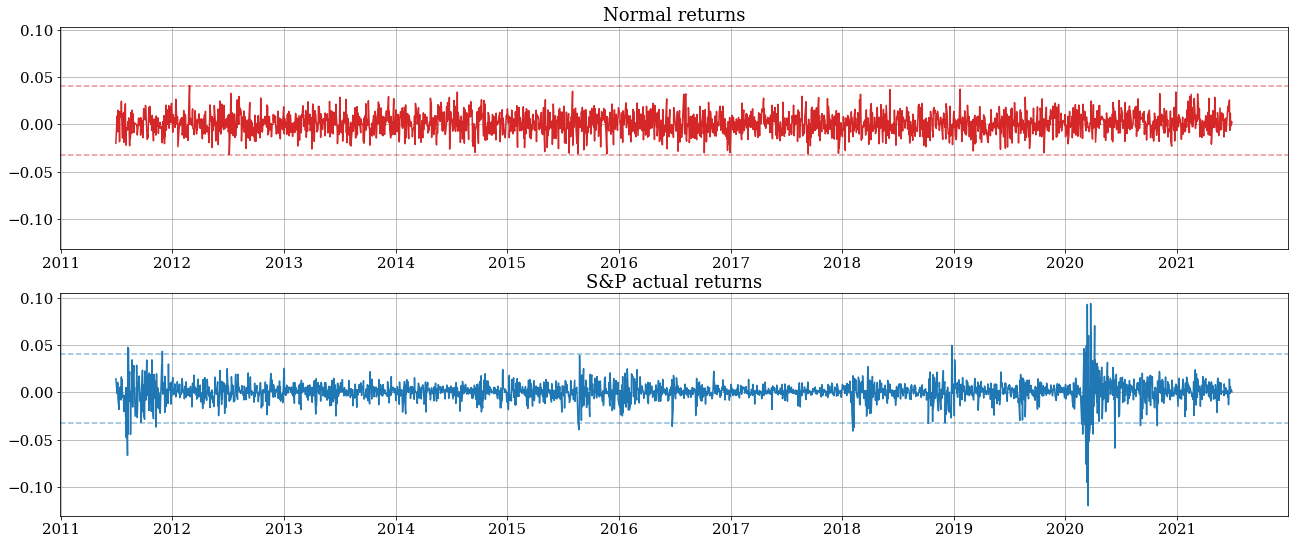

In [83]:
plt.figure(figsize = (22,9))
plt.subplot(2,1,1)
plt.plot(normal_rets, color = 'tab:red')
plt.grid(True)
plt.title('Normal returns')
plt.axhline(min(normal_rets), color = 'tab:red', alpha = .5, linestyle = 'dashed')
plt.axhline(max(normal_rets), color = 'tab:red', alpha = .5, linestyle = 'dashed')
plt.ylim(min(rets)*1.1, max(rets)*1.1)

plt.subplot(2,1,2)
plt.plot(rets)
plt.axhline(min(normal_rets), color = 'tab:blue', alpha = .5, linestyle = 'dashed')
plt.axhline(max(normal_rets), color = 'tab:blue', alpha = .5, linestyle = 'dashed')
plt.grid(True)
plt.title('S&P actual returns')

In [98]:
from scipy.stats import gaussian_kde

actual_density = gaussian_kde(rets)
x = np.linspace(min(rets), max(rets))

normal_density = gaussian_kde(normal_rets)
xn = np.linspace(min(normal_rets), max(normal_rets))

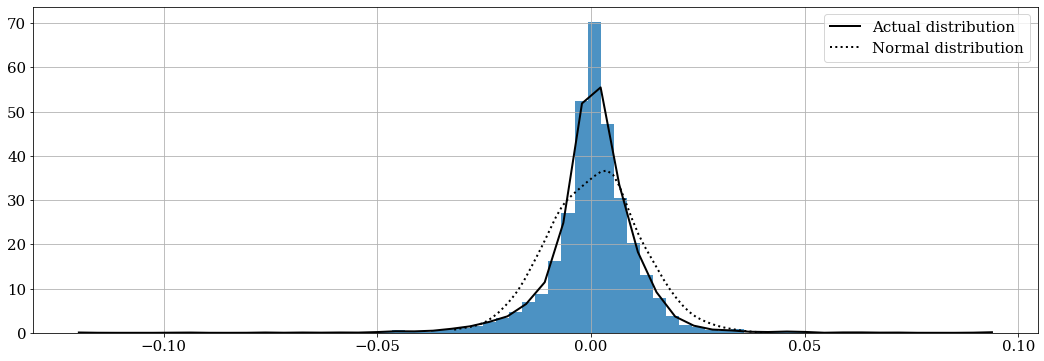

In [103]:
fig = plt.figure(figsize = (18,6))
plt.hist(rets, color = 'tab:blue', bins = 70, density = True, alpha = 0.8)
plt.plot(x, actual_density(x), color = 'black', lw=2, label= 'Actual distribution')
plt.plot(xn, normal_density(xn), linestyle = 'dotted', color = 'red', lw=3, label = 'Normal distribution')
plt.legend()
plt.grid(True)

When we assume a normal distribution, what we see is that there's a very little probability that asset returns take very large positive values
or very large negative values. In this particular case, there are no returns larger than 4% or lower than -4%.
Let's now switch to the actual return on the S&P. What we find is that there are much larger and lower returns compared to the Gaussian assumption. In particular, we see in this picture that daily returns can be as good as 10% or as bad as -10%.


We get to the conclusion that the normal distribution assumption is a simplifying assumption that underestimate the magnitude of extreme returns.
To do justice to the actual shape of the return distribution, we should actually move beyond the mean and variance. We should look at higher moments. So we should look, in particular, at skewness and kurtosis. 


### Skewness:

It is a measure of the asymmetry of the probability distribution of a random variable about its mean. In other words, skewness tells you the amount and direction of skew (departure from horizontal symmetry).
A negative (positive) skew means that you get more positive (negative) returns than you would have expected if the returns were distributed like the normal distribution.

If that returns are normally distributed, the mean and the median would be very close. However, if they are negatively skewed, the expected value (the mean) is greater than the median. If they are positively skewed, the expected value is less than the median.

$$ S(R) = \frac{\sum_{i=1}^{N}(R_i-\bar{R})^3}{N \sigma^3}$$

### Kurtosis:

It tells you the height and sharpness of the central peak, relative to that of a standard bell curve. 
The kurtosis measures the "fatness" of the tails of the distribution. The normal distribution has a kurtosis of 3 and so if the kurtosis of your returns is less than 3 then it tends to have thinner tails, and if the kurtosis is greater than 3 then the distribution has fatter tails.

$$ K(R) = \frac{\sum_{i=1}^{N}(R_i-\bar{R})^4}{N \sigma^4}$$

In [84]:
from scipy.stats import skewnorm, t

skew_a = [-50, 0, 50]
x0 = skewnorm.rvs(skew_a[0], size=10000)
x1 = skewnorm.rvs(skew_a[1],size=10000)
x2 = skewnorm.rvs(skew_a[2], size=10000)

''

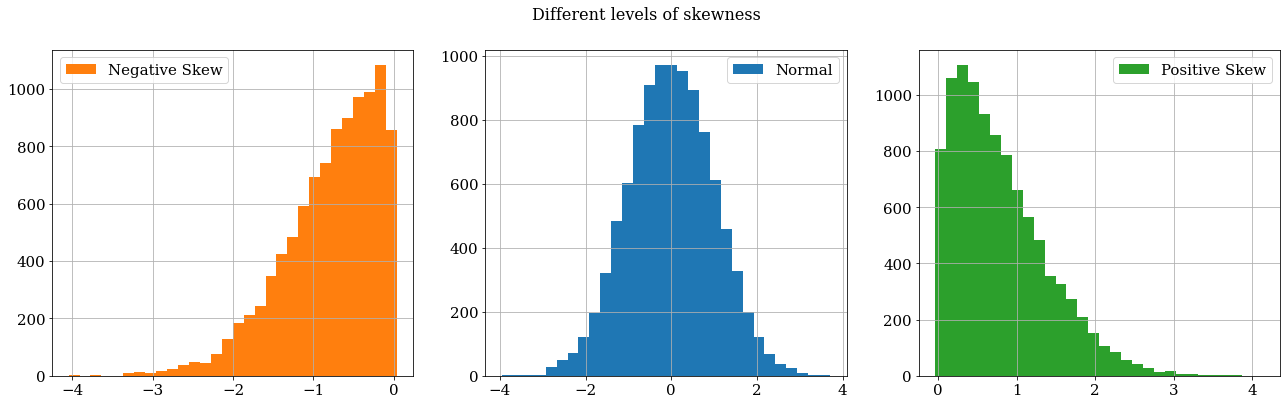

In [85]:
fig = plt.figure(figsize = (22,6))
fig.suptitle('Different levels of skewness', fontsize = 16)

plt.subplot(1,3,1)
plt.hist(x0, color = 'tab:orange', label='Negative Skew', bins = 30)
plt.grid(True)
plt.legend(loc = 'upper left')

plt.subplot(1,3,2)
plt.hist(x1, color = 'tab:blue', label='Normal', bins = 30)
plt.grid(True)
plt.legend(loc = 'best')

plt.subplot(1,3,3)
plt.hist(x2, color = 'tab:green', label='Positive Skew', bins = 30)
plt.grid(True)
plt.legend(loc = 'upper right')

;

In [86]:
df = [5, 10, 200] 
np.random.seed(1)
y0 = t.rvs(df[0], size=10000, loc =0)
y1 = t.rvs(df[1], size=10000, loc =0)
y2 = t.rvs(df[2], size=10000, loc =0)

''

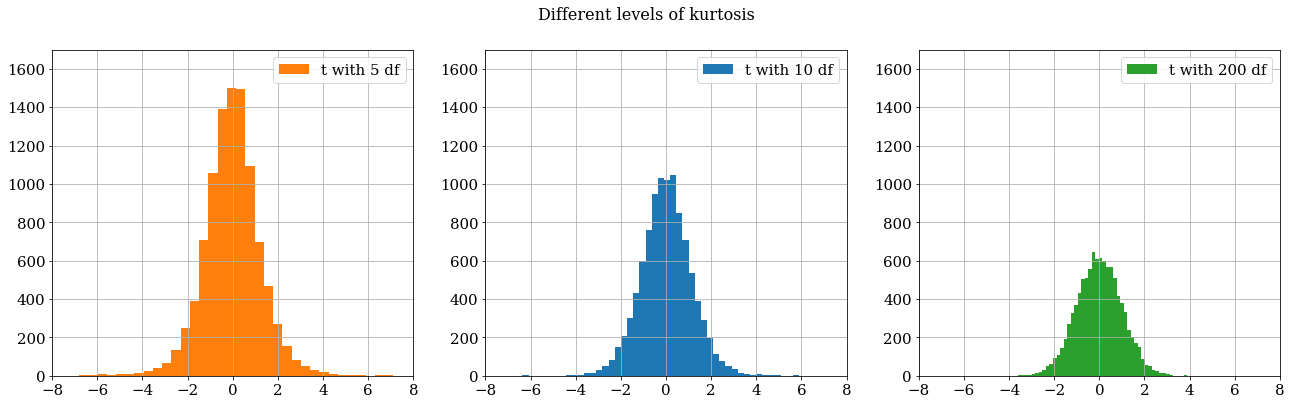

In [87]:
ylim = 1700
xlim = 8

fig = plt.figure(figsize = (22,6))
fig.suptitle('Different levels of kurtosis', fontsize = 16)

plt.subplot(1,3,1)
plt.hist(y0, color = 'tab:orange', label='t with 5 df', bins = 50)
plt.grid(True)
plt.legend(loc = 'best')
plt.ylim(0,ylim)
plt.xlim(-xlim,xlim)

plt.subplot(1,3,2)
plt.hist(y1, color = 'tab:blue', label='t with 10 df', bins = 50)
plt.grid(True)
plt.legend(loc = 'best')
plt.ylim(0,ylim)
plt.xlim(-xlim,xlim)

plt.subplot(1,3,3)
plt.hist(y2, color = 'tab:green', label='t with 200 df', bins = 50)
plt.grid(True)
plt.legend(loc = 'best')
plt.ylim(0,ylim)
plt.xlim(-xlim,xlim)

;

In [91]:
hfi = pd.read_csv("Ana/Data/Hedge_funds_index.csv",
                      header=0, index_col=0, parse_dates=True)
hfi = hfi/100
hfi.index = hfi.index.to_period('M')

In [92]:
hfi

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01,0.0119,0.0393,0.0178,0.0791,0.0189,0.0213,0.0191,0.0573,0.0281,0.0150,0.0180,-0.0166,0.0317
1997-02,0.0123,0.0298,0.0122,0.0525,0.0101,0.0084,0.0122,0.0175,-0.0006,0.0034,0.0118,0.0426,0.0106
1997-03,0.0078,-0.0021,-0.0012,-0.0120,0.0016,-0.0023,0.0109,-0.0119,-0.0084,0.0060,0.0010,0.0778,-0.0077
1997-04,0.0086,-0.0170,0.0030,0.0119,0.0119,-0.0005,0.0130,0.0172,0.0084,-0.0001,0.0122,-0.0129,0.0009
1997-05,0.0156,-0.0015,0.0233,0.0315,0.0189,0.0346,0.0118,0.0108,0.0394,0.0197,0.0173,-0.0737,0.0275
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07,0.0021,-0.0058,0.0093,0.0040,-0.0010,0.0055,0.0022,-0.0014,0.0067,-0.0021,0.0045,-0.0052,0.0018
2018-08,0.0024,0.0166,0.0002,-0.0277,0.0004,0.0011,0.0017,-0.0007,0.0035,0.0050,-0.0002,-0.0214,0.0015
2018-09,0.0034,-0.0054,0.0050,-0.0110,-0.0016,0.0032,0.0036,0.0006,-0.0023,0.0028,0.0018,0.0036,-0.0022


In [104]:
import scipy.stats as scs

In [107]:
def normality_stats(rets):
    print("Skew of data set %14.3f" % scs.skew(rets))
    print("Skew test p-value %13.3f" % scs.skewtest(rets)[1])
    print("Exc Kurt of data set %10.3f" % scs.kurtosis(rets))
    print("Kurt test p-value %13.3f" % scs.kurtosistest(rets)[1])
    
def is_normal(rets, level = 0.01):
    pvalue = scs.normaltest(rets)[1]
    return pvalue>level

In [110]:
for ticker in hfi.columns:
    print('Results for '+ticker)
    print(30 * "-")
    normality_stats(hfi[ticker])
    print("")

Results for Convertible Arbitrage
------------------------------
Skew of data set         -2.640
Skew test p-value         0.000
Exc Kurt of data set     20.281
Kurt test p-value         0.000

Results for CTA Global
------------------------------
Skew of data set          0.174
Skew test p-value         0.241
Exc Kurt of data set     -0.047
Kurt test p-value         0.962

Results for Distressed Securities
------------------------------
Skew of data set         -1.301
Skew test p-value         0.000
Exc Kurt of data set      4.890
Kurt test p-value         0.000

Results for Emerging Markets
------------------------------
Skew of data set         -1.167
Skew test p-value         0.000
Exc Kurt of data set      6.251
Kurt test p-value         0.000

Results for Equity Market Neutral
------------------------------
Skew of data set         -2.124
Skew test p-value         0.000
Exc Kurt of data set     14.219
Kurt test p-value         0.000

Results for Event Driven
---------------------

In [111]:
hfi.aggregate(is_normal)

Convertible Arbitrage     False
CTA Global                 True
Distressed Securities     False
Emerging Markets          False
Equity Market Neutral     False
Event Driven              False
Fixed Income Arbitrage    False
Global Macro              False
Long/Short Equity         False
Merger Arbitrage          False
Relative Value            False
Short Selling             False
Funds Of Funds            False
dtype: bool

In conclusion, returns are not normally distributed and assuming that they are comes with a big cost. 
That is why we are going to introduce some extreme risk measures that go beyond volatility and so a better job at measuring these extreme downside risk, which is embedded in those non-Gaussian return distributions. 

# Downside risk measures


## Semi volatility or semi deviation

This measure recognize that volatility on the upside is not a bad thing for investors and it only looks at the negative fluctuations of an asset. 
It truncates the return distribution and it only focus on the outcomes either below the mean or below zero. 

In [112]:
def semideviation(r):
    """
    Returns the semideviation aka negative semideviation of r
    r must be a Series or a DataFrame, else raises a TypeError
    """
    is_negative = r < 0
    return r[is_negative].std(ddof=0)

In [114]:
semideviation(hfi).sort_values()

Global Macro              0.006579
Merger Arbitrage          0.008875
Equity Market Neutral     0.009566
Funds Of Funds            0.012122
Relative Value            0.012244
CTA Global                0.012443
Long/Short Equity         0.014051
Distressed Securities     0.015185
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Convertible Arbitrage     0.019540
Short Selling             0.027283
Emerging Markets          0.028039
dtype: float64

# Value at Risk (VaR)


The loss on a trading portfolio such that there is a probability $p$ of losses equaling or exceeding VaR in a given trading period and a $(1-p)$ probability of losses being lower than the VaR (i.e., the confidence level).

We may write it as $VaR(p)$ or $VaR$ at $100 \times  p \%$ to make the dependence on probability explicit. The most common probability levels are 1% or 5%.

VaR is a quantile of the distribution of profit and loss (P&L). We indicate P&L on an investment portfolio by the random variable $Q$, with a particular realization indicated by $q$. The density of P/L is denoted by $f_q (.)$. Thus, VaR is given by:

$$p = Pr[Q \leq -VaR(p)]$$

or

$$p = \int_{-\infty}^{-VaR(p)}f_q(x)dx$$

We use a minus sign because VaR is a positive number and we are dealing with losses. You should then interpret it as *the probability of losses being larger than VaR*.


We'll look at three different ways to compute Value At Risk:

1. Historic VaR
2. Parametric Gaussian VaR
3. Modified (Cornish-Fisher) VaR



## Historic VaR

The issue here is: what is the probability distibution of P&L of a portfolio? The above discussion was based on the assumption that that distribution was known. Howerever, in practice, one needs to estimate the P&L distribution and one way to do that is by using historical observations of the asset returns of interest. This historical simulation is a simple method for forecasting risk and relies on the assumption that history repeats itself, where one of the observed past returns is expected to be the next period return.

In [115]:
def var_historic(r, level=5):
    """
    Returns the historic Value at Risk at a specified level
    i.e. returns the number such that "level" percent of the returns
    fall below that number, and the (100-level) percent are above
    """
    if isinstance(r, pd.DataFrame):
        return r.aggregate(var_historic, level=level)
    elif isinstance(r, pd.Series):
        return -np.percentile(r, level)
    else:
        raise TypeError("Expected r to be a Series or DataFrame") 

## Parametric Gaussian VaR

The idea behind this is very simple. If a set of returns is normally distributed, we know, for instance, that 50% of the returns are below the mean and 50% are above.

In general we can always convert a percentile point to a z-score (which is the number of standard deviations away from the mean that a number is). Therefore, if we can convert the VaR level (such as 1% or 5%) to a z-score, we can calculate the return level where that percent of returns lie below it. 
All we need to do to estimate the VaR using this method is to find the z-score corresponding to percentile level, and then add that many standard deviations to the mean, to obtain the VaR.

`scipy.stat.norm` contains a function `ppf()` which does exactly that: it takes a percentile such as 0.05 or 0.01 and gives you the z-score corresponding to that in the normal distribution.

In [116]:
from scipy.stats import norm
def var_gaussian(r, level=5):
    """
    Returns the Parametric Gauusian VaR of a Series or DataFrame
    """
    # compute the Z score assuming it was Gaussian
    z = norm.ppf(level/100)
    return -(r.mean() + z*r.std(ddof=0))

## Cornish-Fisher Modification

The Cornish-Fisher modification is an elegant and simple adjustment.

The z-score tells us how many standard deviations away from the mean we need to go to find the VaR. If the returns arent normal, we know that z-score will give us an inaccurate number. The basic idea is that since we can observe the skewness and kurtosis of the data, we can adjust the z-score up or down to come up with a modifed z-score. e.g. intuitively, all other things being equal, if the skewness is negative, we'll decrease the z-score further down, and if the skewness is positive, we'll push it up.

The adjusted z-score which we'll call $z_{cornishfisher}$ given by:

$$ z_{cornishfisher} = z +\frac{1}{6}(z^2-1)S + \frac{1}{24}(z^3-3z)(K-3)-\frac{1}{36}(2z^3-5z)S^2 $$


We can modify the previous function by adding a "modified" parameter with a default value of `True` as follows. If `True` then the following piece of code is executed, which modifes `z`:

In [118]:
def var_gaussian(r, level=5, modified=False):
    """
    Returns the Parametric Gauusian VaR of a Series or DataFrame
    If "modified" is True, then the modified VaR is returned,
    using the Cornish-Fisher modification
    """
    # compute the Z score assuming it was Gaussian
    z = norm.ppf(level/100)
    if modified:
        # modify the Z score based on observed skewness and kurtosis
        s = scs.skew(r)
        k = scs.kurtosis(r)
        

        z = (z +
                (z**2 - 1)*s/6 +
                (z**3 -3*z)*(k-3)/24 -
                (2*z**3 - 5*z)*(s**2)/36
            )
        
    return -(r.mean() + z*r.std(ddof=0))

We can now compare the different methods:

In [120]:
var_table = [var_gaussian(hfi), 
             var_gaussian(hfi, modified=True), 
             var_historic(hfi)]
comparison = pd.concat(var_table, axis=1)
comparison.columns=['Gaussian', 'Cornish-Fisher', 'Historic']

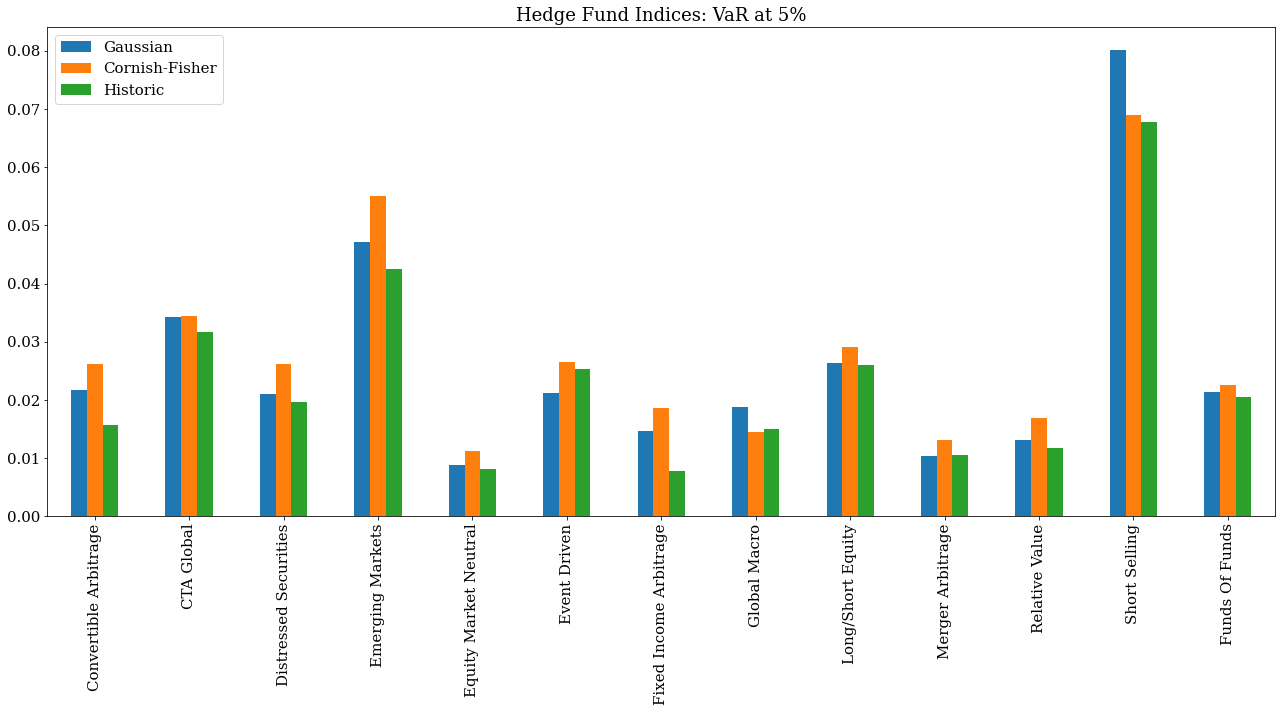

In [128]:
comparison.plot.bar(title="Hedge Fund Indices: VaR at 5%", figsize = (22,9))

## Expected shortfall (ES) or Conditional VaR (CVaR)

One of the flaws of the VaR aproach is that it is simply a quantile. In practice, the actual loss, if it occurs, can be grater than VaR. In this sense, VaR may understimate the actual loss.
The most common alternative risk measure that tries to fill that gap is **expected shortfall** (ES), also known as tail VaR, conditional Value at Risk (CVaR), among others. ES answers the question: *what is expected loss when losses exceed VaR?*

$$ES = -E[Q|Q\leq-VaR(p)]$$


In [124]:
def cvar_historic(r, level=5):
    """
    Computes the Conditional VaR of Series or DataFrame
    """
    if isinstance(r, pd.Series):
        is_beyond = r <= -var_historic(r, level=level)
        return -r[is_beyond].mean()
    elif isinstance(r, pd.DataFrame):
        return r.aggregate(cvar_historic, level=level)
    else:
        raise TypeError("Expected r to be a Series or DataFrame")

In [126]:
cvar_historic(hfi)

Convertible Arbitrage     0.036550
CTA Global                0.041264
Distressed Securities     0.036429
Emerging Markets          0.072364
Equity Market Neutral     0.016879
Event Driven              0.038336
Fixed Income Arbitrage    0.028257
Global Macro              0.020629
Long/Short Equity         0.041943
Merger Arbitrage          0.019143
Relative Value            0.024650
Short Selling             0.096821
Funds Of Funds            0.033207
dtype: float64